# **Problema 1 - Aprendizaje Automático II**
# *Integrantes*: 
* ### Demarré, Lucas
* ### Donnarumma, César
* ### Longo, Bruno

---

# **Tabla de contenidos**

1.   [**Librerías**](#)
2.   [**Descargamos y descomprimimos el Dataset**](#)
3.   [**Establecemos la GPU por defecto en caso de estar disponible**](#)
4.   [**Visualizamos los datos**](#)
        1.   [*Cargamos el Dataset*](#)
        2.   [*Mostramos algunas filas*](#)
        3.   [*Mostramos información acerca del Dataset*](#)
        4.   [*Observaciones*](#)
5.   [**Análisis exploratorio**](#)
        1.   [*Variable: 'Hours Studied'*](#)
                1.   [**Información general**](#)
                2.   [**Frecuencia absoluta**](#)
                3.   [**Cantidad de horas estudiadas vs Cantidad de alumnos**](#)
                4.   [**Distribución de cantidad de horas**](#)
                5.   [**Observaciones**](#)
        2.   [*Variable: 'Previous Scores'*](#)
                1.   [**Información general**](#)
                2.   [**Frecuencia absoluta**](#)
                3.   [**Notas anteriores vs Cantidad de alumnos**](#)
                4.   [**Frecuencia absoluta (por intervalos)**](#)
                5.   [**Intervalos de notas anteriores vs Cantidad de alumnos (agrupado en intervalos)**](#)
                6.   [**Distribución de las notas sacadas previamente**](#)
                7.   [**Observaciones**](#)
        3.   [*Variable: 'Extracurricular Activities'*](#)
                1.   [**Información general**](#)
                2.   [**Convertimos la variable a binaria**](#)
                3.   [**Distribución de Actividades Extracurriculares**](#)
                4.   [**Observaciones**](#)
        4.   [*Variable: 'Sleep Hours'*](#)
                1.   [**Información general**](#)
                2.   [**Frecuencia absoluta**](#)
                3.   [**Cantidad promedio de horas de sueño vs Cantidad de alumnos**](#)
                4.   [**Distribución de cantidad de horas promedio de sueño**](#)
                5.   [**Observaciones**](#)
        5.   [*Variable: 'Sample Question Papers Practiced'*](#)
                1.   [**Información general**](#)
                2.   [**Frecuencia absoluta**](#)
                3.   [**Cuestionarios de muestra vs Cantidad de alumnos**](#)
                4.   [**Distribución de cuestionarios de muestra**](#)
                5.   [**Observaciones**](#)
        5.   [*Variable: 'Performance Index'*](#)
                1.   [**Información general**](#)
                2.   [**Cambiamos el tipo de datos de la variable**](#)
                3.   [**Frecuencia absoluta (por intervalos)**](#)
                4.   [**Intervalos Índice rendimiento academico general vs Cantidad de alumnos (agrupado en intervalos)**](#)
                5.   [**Distribución de cuestionarios de muestra**](#)
                6.   [**Observaciones**](#)
6.   [**Matriz de correlación**](#)
7.   [**Escalar variables**](#)
8.   [**Division Train-Test**](#)
9.   [**Redes Neuronales Densas**](#)
        1.   [*Preparacion de R2 Ajustado para poder incluirlo como metrica en .compile()*](#)
        2.   [*Prueba de modelo con únicamente una capa de salida y un LR fijo*](#)
        3.   [*Prueba de modelo con dos capas ocultas con dos neuronas cada una y LR ajustado automáticamente*](#)
        4.   [*Observaciones*](#)

## 1. **Librerías**

In [1]:
import time
import gdown
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

## 2. **Descargamos y descomprimimos el Dataset**

In [2]:
# Descargamos el dataset "TP1-1-student_performance.zip"
gdown.download('https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc')

# Descomprimimos el dataset
with zipfile.ZipFile('TP1-1-student_performance.zip', 'r') as zip_ref: zip_ref.extractall('./TP1-1')

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: D:\Cosas de la escuela\Técnicatura en Inteligencia Artificial\Aprendizaje Automático II\Github\Problema 1\TP1-1-student_performance.zip
100%|██████████████████████████████████████████████████████████████████████████████| 49.7k/49.7k [00:00<00:00, 230kB/s]


## 3. **Establecemos la GPU por defecto en caso de estar disponible**

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


## 4. **Visualizamos los datos**

### 4.1. *Cargamos el Dataset*

In [4]:
# Cargamos el .csv
estudiantes = pd.read_csv('TP1-1/Student_Performance.csv')

### 4.2. *Mostramos algunas filas*

In [5]:
# Mostramos algunas filas del dataset
estudiantes.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### 4.3. *Mostramos información acerca del Dataset*

In [6]:
# Informacion del dataset
estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### 4.4. *Observaciones*

En el **Dataset** encontramos 6 variables con 10000 filas cada una, siendo 5 de ellas variables independientes y 1 dependiente, nuestra variable objetivo, **Performance Index**. Las 5 variables explicativas no tienen valores nulos, además 4 de ellas son numéricas, con números naturales y solo 1 booleana.

## 5. **Análisis exploratorio**

### 5.1. *Variable: 'Hours Studied'*

#### 5.1.1. **Información general**

In [7]:
divider = "-" * 49

print(f'{divider}\n             Variable: "Hours Studied"\n{divider}')

print(f'Valores unicos: {np.sort(estudiantes["Hours Studied"].unique())}')
print(f'Cantidad de valores unicos: {estudiantes["Hours Studied"].nunique()}')
print(f'Tipo de dato: {estudiantes["Hours Studied"].dtype}')

print(f'{divider}\n{estudiantes["Hours Studied"].describe()}\n{divider}')

-------------------------------------------------
             Variable: "Hours Studied"
-------------------------------------------------
Valores unicos: [1 2 3 4 5 6 7 8 9]
Cantidad de valores unicos: 9
Tipo de dato: int64
-------------------------------------------------
count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64
-------------------------------------------------


#### 5.1.2. **Frecuencia absoluta**

In [8]:
# Cálculo de frecuencia absoluta para grafico de barras
frec_abs_hours = estudiantes['Hours Studied'].value_counts().to_frame().sort_index().reset_index()
frec_abs_hours = frec_abs_hours.rename(columns={'Hours Studied': 'cantidad_horas', 'count': 'frec_abs'})
frec_abs_hours

,cantidad_horas,frec_abs
0,1,1152
1,2,1085
2,3,1119
3,4,1085
4,5,1094
5,6,1133
6,7,1129
7,8,1088
8,9,1115


#### 5.1.3. **Cantidad de horas estudiadas vs Cantidad de alumnos**

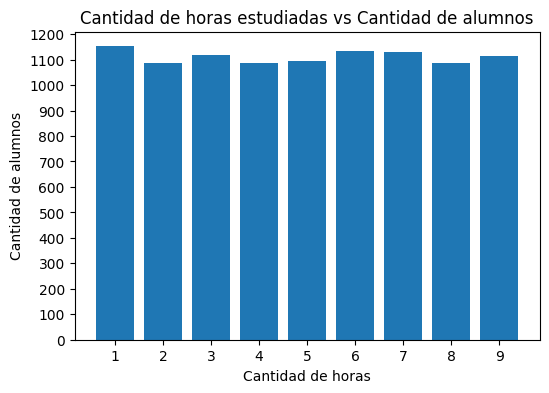

In [9]:
plt.figure(figsize=(6,4))
plt.bar(x='cantidad_horas', height='frec_abs', data=frec_abs_hours)
plt.xlabel(xlabel='Cantidad de horas')
plt.xticks(ticks=np.arange(1,10,1))
plt.ylabel(ylabel='Cantidad de alumnos')
plt.yticks(ticks=np.arange(0,1201,100))
plt.title(label='Cantidad de horas estudiadas vs Cantidad de alumnos')
plt.show()

#### 5.1.4. **Distribución de cantidad de horas**

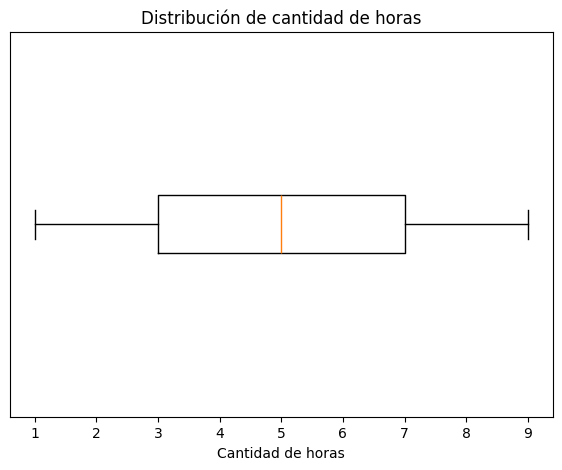

In [10]:
plt.figure(figsize=(7,5))
plt.boxplot(x=estudiantes['Hours Studied'], vert=False)
plt.xlabel(xlabel='Cantidad de horas')
plt.yticks(ticks=[])
plt.title(label='Distribución de cantidad de horas')
plt.show()

#### 5.1.5. **Observaciones**

* La distribucion es simetrica.
* No se presentan valores atípicos.
* A lo largo de los distintos valores de cantidades de horas la cantidad de alumnos es mas o menos similar.

### 5.2. *Variable: 'Previous Scores'*

#### 5.2.1. **Información general**

In [11]:
divider = "-" * 49

print(f'{divider}\n             Variable: "Previous Scores"\n{divider}')

print(f'Valores unicos: {np.sort(estudiantes["Previous Scores"].unique())}')
print(f'Cantidad de valores unicos: {estudiantes["Previous Scores"].nunique()}')
print(f'Tipo de dato: {estudiantes["Previous Scores"].dtype}')

print(f'{divider}\n{estudiantes["Previous Scores"].describe()}\n{divider}')

-------------------------------------------------
             Variable: "Previous Scores"
-------------------------------------------------
Valores unicos: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95 96 97 98 99]
Cantidad de valores unicos: 60
Tipo de dato: int64
-------------------------------------------------
count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64
-------------------------------------------------


#### 5.2.2. **Frecuencia absoluta**

In [12]:
# Cálculo de frecuencia absoluta para grafico de barras
frec_abs_scores = estudiantes['Previous Scores'].value_counts().to_frame().sort_index().reset_index()
frec_abs_scores = frec_abs_scores.rename(columns={'Previous Scores': 'notas_anteriores', 'count': 'frec_abs'})
frec_abs_scores

,notas_anteriores,frec_abs
0,40,173
1,41,169
2,42,171
3,43,167
4,44,170
5,45,154
6,46,163
7,47,172
8,48,170
9,49,175


#### 5.2.3. **Notas anteriores vs Cantidad de alumnos**

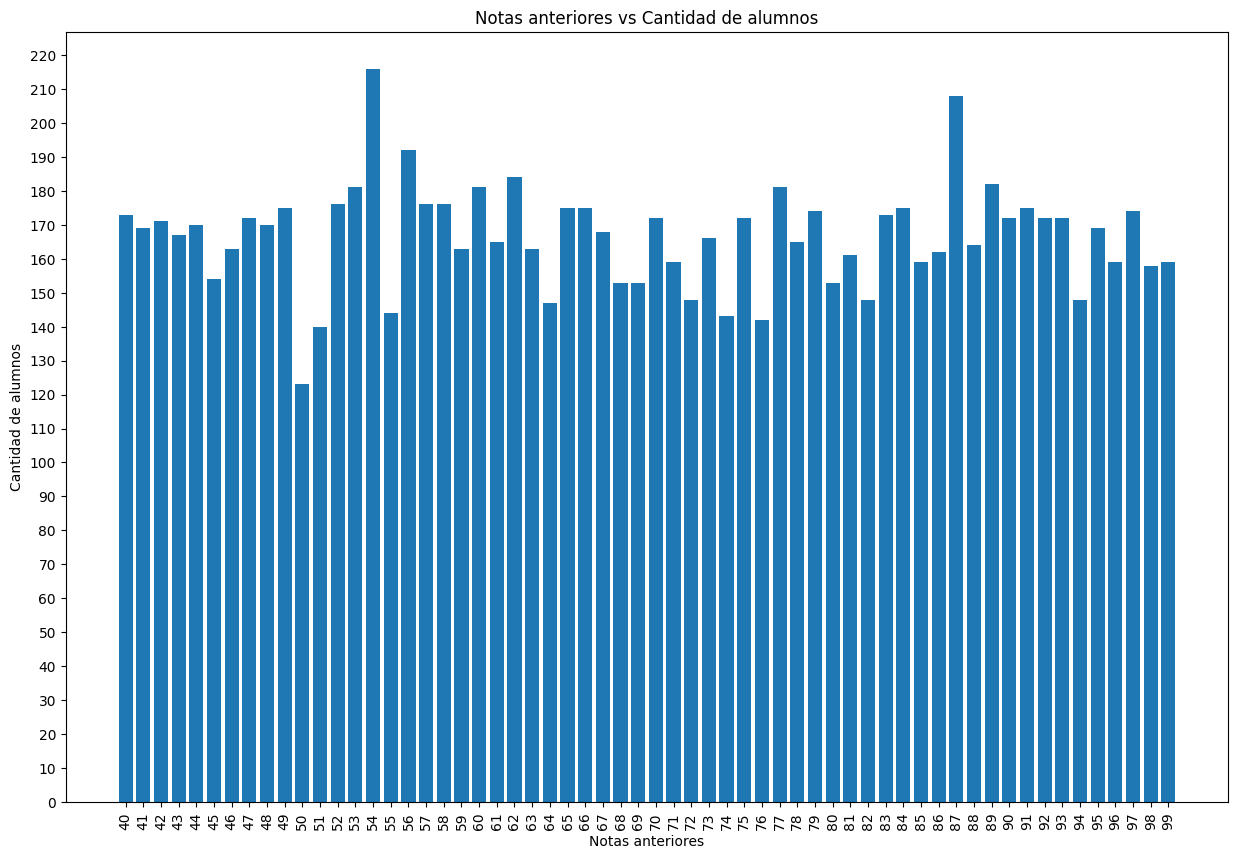

In [13]:
plt.figure(figsize=(15,10))
plt.bar(x='notas_anteriores', height='frec_abs', data=frec_abs_scores)
plt.xlabel(xlabel='Notas anteriores')
plt.xticks(ticks=np.arange(40,100,1), rotation=90)
plt.ylabel(ylabel='Cantidad de alumnos')
plt.yticks(ticks=np.arange(0,221,10))
plt.title(label='Notas anteriores vs Cantidad de alumnos')
plt.show()

#### 5.2.4. **Frecuencia absoluta (por intervalos)**

In [14]:
frec_abs_scores_intervalos = pd.cut(x=estudiantes['Previous Scores'], bins=np.arange(40,101,5), right=False)
frec_abs_scores_intervalos = frec_abs_scores_intervalos.value_counts().to_frame().reset_index().rename(columns={'Previous Scores':'intervalos' ,	'count': 'frec_abs'}).sort_values(by='intervalos').reset_index(drop=True)
frec_abs_scores_intervalos

,intervalos,frec_abs
0,"[40, 45)",850
1,"[45, 50)",834
2,"[50, 55)",836
3,"[55, 60)",851
4,"[60, 65)",840
5,"[65, 70)",824
6,"[70, 75)",788
7,"[75, 80)",834
8,"[80, 85)",810
9,"[85, 90)",875


#### 5.2.5. **Intervalos de notas anteriores vs Cantidad de alumnos (agrupado en intervalos)**

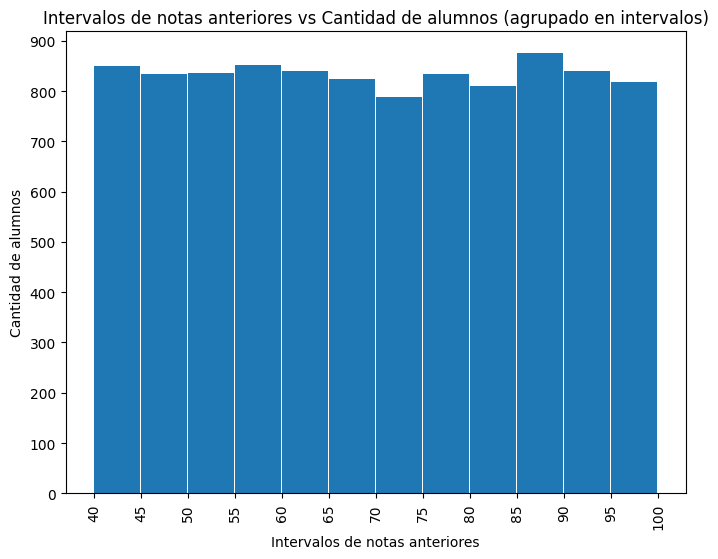

In [15]:
plt.figure(figsize=(8,6))
plt.bar(x=np.arange(40,100,5), height='frec_abs', data=frec_abs_scores_intervalos, align='edge', width=4.9)
plt.xlabel(xlabel='Intervalos de notas anteriores')
plt.xticks(ticks=np.arange(40,101,5), rotation=90)
plt.ylabel(ylabel='Cantidad de alumnos')
plt.yticks(ticks=np.arange(0,901,100))
plt.title(label='Intervalos de notas anteriores vs Cantidad de alumnos (agrupado en intervalos)')
plt.show()

#### 5.2.6. **Distribución de las notas sacadas previamente**

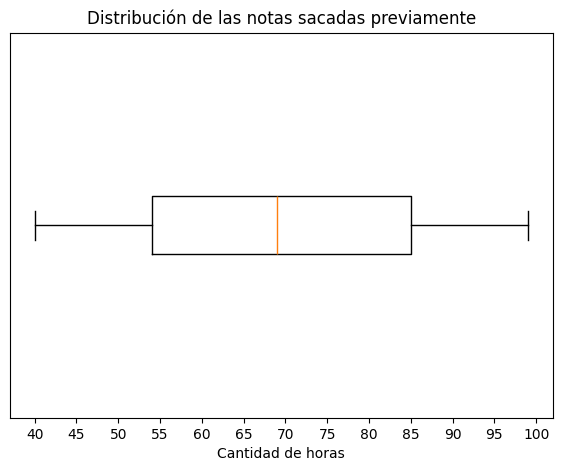

In [16]:
plt.figure(figsize=(7,5))
plt.boxplot(x=estudiantes['Previous Scores'], vert=False)
plt.xlabel(xlabel='Cantidad de horas')
plt.xticks(ticks=np.arange(40,101,5))
plt.yticks(ticks=[])
plt.title(label='Distribución de las notas sacadas previamente')
plt.show()

#### 5.2.7. **Observaciones**

**Información general:**
* Todas las notas previas se distribuyen entre *40* y *99*.

**Notas anteriores vs Cantidad de alumnos:**
* Si bien las notas van de *40* a *99* al ver como se distribuyen en relación a la cantidad de alumnos vemos que las cantidades van entre *120* y *220*.
* La nota más común es *54*.
* La menos común es *50*.

**Intervalos de notas anteriores vs Cantidad de alumnos (agrupado en intervalos):**

Agrupando las notas por intervalos que contienen 5 valores:
  * La mayoría de alumnos se encuentran en: *[85; 89]*.
  * El intervalo con menos cantidad de alumnos es: *[70; 74]*.
  * Todos los intervalos contienen entre *800* y *900* alumnos.

**Distribución de las notas sacadas previamente:**
* La distribución es simetrica.
* No presenta valores atípicos.
* Con el boxplot se confirma lo visto en el grafico de barras agrupado por intervalos: *55 Q1*, *70 Q2*, *85 Q3*, *100 Q4*.

### 5.3. *Variable: 'Extracurricular Activities'*

#### 5.3.1. **Información general**

In [17]:
divider = "-" * 49

print(f'{divider}\n      Variable: "Extracurricular Activities"\n{divider}')

print(f'Valores unicos: {np.sort(estudiantes["Extracurricular Activities"].unique())}')

print(f'{divider}\n{estudiantes["Extracurricular Activities"].describe()}\n{divider}')

-------------------------------------------------
      Variable: "Extracurricular Activities"
-------------------------------------------------
Valores unicos: ['No' 'Yes']
-------------------------------------------------
count     10000
unique        2
top          No
freq       5052
Name: Extracurricular Activities, dtype: object
-------------------------------------------------


#### 5.3.2. **Convertimos la variable a binaria**

In [18]:
# Reemplazar str por int:
estudiantes['Extracurricular Activities'] = estudiantes['Extracurricular Activities'].replace(to_replace={'Yes': 1, 'No': 0})
estudiantes['Extracurricular Activities'].head()

C:\Users\lucas\AppData\Local\Temp\ipykernel_26460\1117126318.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  estudiantes['Extracurricular Activities'] = estudiantes['Extracurricular Activities'].replace(to_replace={'Yes': 1, 'No': 0})


0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

#### 5.3.3. **Distribución de Actividades Extracurriculares**

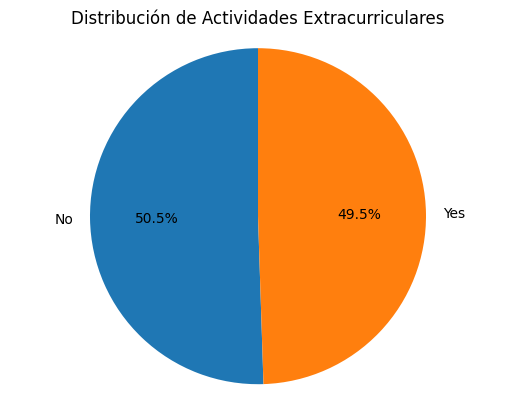

In [19]:
plt.pie(estudiantes['Extracurricular Activities'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Actividades Extracurriculares')
plt.axis('equal')
plt.show()

#### 5.3.4. **Observaciones**

**Información general:**
* La variable era de tipo object por lo que se tuvo que convertir a binaria.
* Los valores únicos no fueron cargados con ambiguedades
* La moda es *'No'* con 5052 / 10000, lo que indica que esta distribuida bastante uniformemente.

**Distribución de Actividades Extracurriculares**
* Los valores están bien distribuidos.

### 5.4. *Variable: 'Sleep Hours'*

#### 5.4.1. **Información general**

In [20]:
divider = "-" * 49

print(f'{divider}\n             Variable: "Sleep Hours"\n{divider}')

print(f'Valores unicos: {np.sort(estudiantes["Sleep Hours"].unique())}')
print(f'Cantidad de valores unicos: {estudiantes["Sleep Hours"].nunique()}')
print(f'Tipo de dato: {estudiantes["Sleep Hours"].dtype}')

print(f'{divider}\n{estudiantes["Sleep Hours"].describe()}\n{divider}')

-------------------------------------------------
             Variable: "Sleep Hours"
-------------------------------------------------
Valores unicos: [4 5 6 7 8 9]
Cantidad de valores unicos: 6
Tipo de dato: int64
-------------------------------------------------
count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64
-------------------------------------------------


#### 5.4.2. **Frecuencia absoluta**

In [21]:
# Cálculo de frecuencia absoluta para grafico de barras
frec_abs_sleep = estudiantes['Sleep Hours'].value_counts().to_frame().sort_index().reset_index()
frec_abs_sleep = frec_abs_sleep.rename(columns={'Sleep Hours': 'cantidad_horas_sueño', 'count': 'frec_abs'})
frec_abs_sleep

,cantidad_horas_sueño,frec_abs
0,4,1619
1,5,1606
2,6,1673
3,7,1676
4,8,1804
5,9,1622


#### 5.4.3. **Cantidad promedio de horas de sueño vs Cantidad de alumnos**

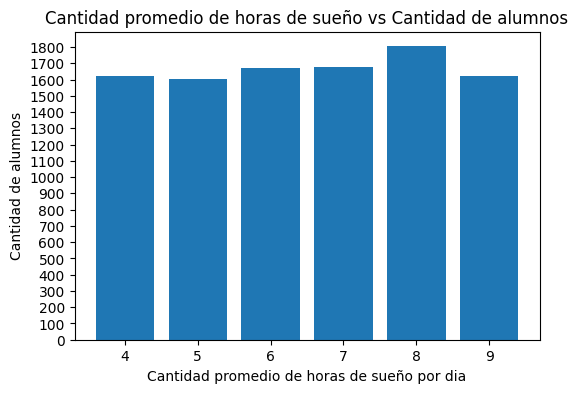

In [22]:
plt.figure(figsize=(6,4))
plt.bar(x='cantidad_horas_sueño', height='frec_abs', data=frec_abs_sleep)
plt.xlabel(xlabel='Cantidad promedio de horas de sueño por dia')
plt.xticks(ticks=np.arange(4,10,1))
plt.ylabel(ylabel='Cantidad de alumnos')
plt.yticks(ticks=np.arange(0,1801,100))
plt.title(label='Cantidad promedio de horas de sueño vs Cantidad de alumnos')
plt.show()

#### 5.4.4. **Distribución de cantidad de horas promedio de sueño**

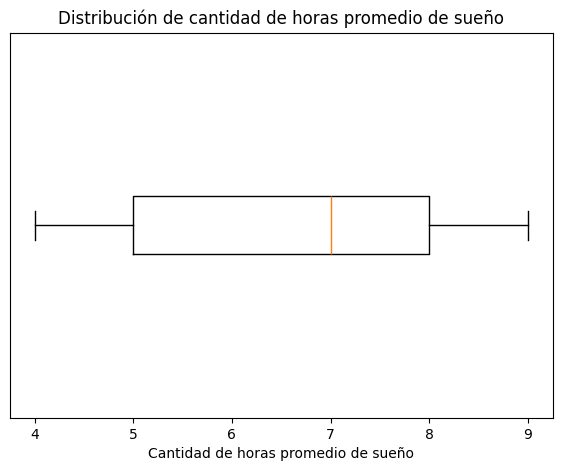

In [23]:
plt.figure(figsize=(7,5))
plt.boxplot(x=estudiantes['Sleep Hours'], vert=False)
plt.xlabel(xlabel='Cantidad de horas promedio de sueño')
plt.yticks(ticks=[])
plt.title(label='Distribución de cantidad de horas promedio de sueño')
plt.show()

#### 5.4.5. **Observaciones**

**Cantidad promedio de horas de sueño vs Cantidad de alumnos:**
* En promedio la mayoría de alumnos duermen 8hs por día.
* De modo contrario, la cantidad promedio de horas en la que la menor cantidad de alumnos durmieron es de 5hs diarias.

**Distribución de cantidad de horas promedio de sueño:**
* La distribución no presenta valores atípicos.
* En el boxplot se puede comprobar lo que se muestra en el gráfico de barras. Aproximadamente el 50% de los alumnos durmieron a lo sumo 6hs, y el otro 50% al menos 7hs.

### 5.5. *Variable: 'Sample Question Papers Practiced'*

#### 5.5.1. **Información general**

In [24]:
divider = "-" * 49

print(f'{divider}\n  Variable: "Sample Question Papers Practiced"\n{divider}')

print(f'Valores unicos: {np.sort(estudiantes["Sample Question Papers Practiced"].unique())}')
print(f'Cantidad de valores unicos: {estudiantes["Sample Question Papers Practiced"].nunique()}')
print(f'Tipo de dato: {estudiantes["Sample Question Papers Practiced"].dtype}')

print(f'{divider}\n{estudiantes["Sample Question Papers Practiced"].describe()}\n{divider}')

-------------------------------------------------
  Variable: "Sample Question Papers Practiced"
-------------------------------------------------
Valores unicos: [0 1 2 3 4 5 6 7 8 9]
Cantidad de valores unicos: 10
Tipo de dato: int64
-------------------------------------------------
count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64
-------------------------------------------------


#### 5.5.2. **Frecuencia absoluta**

In [25]:
# Cálculo de frecuencia absoluta para grafico de barras
frec_abs_practiced = estudiantes['Sample Question Papers Practiced'].value_counts().to_frame().sort_index().reset_index()
frec_abs_practiced = frec_abs_practiced.rename(columns={'Sample Question Papers Practiced': 'cantidad_horas_sueño', 'count': 'frec_abs'})
frec_abs_practiced

,cantidad_horas_sueño,frec_abs
0,0,951
1,1,978
2,2,930
3,3,1035
4,4,955
5,5,1028
6,6,1059
7,7,987
8,8,1026
9,9,1051


#### 5.5.3. **Cuestionarios de muestra vs Cantidad de alumnos**

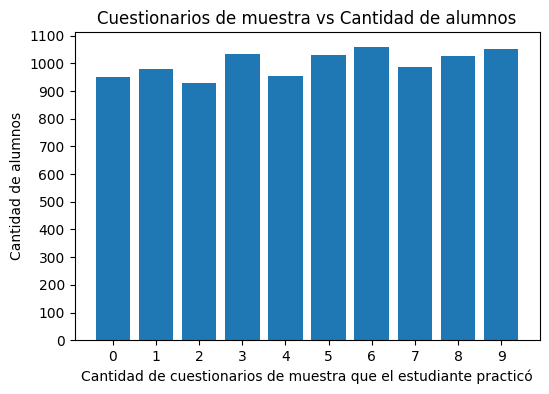

In [26]:
plt.figure(figsize=(6,4))
plt.bar(x='cantidad_horas_sueño', height='frec_abs', data=frec_abs_practiced)
plt.xlabel(xlabel='Cantidad de cuestionarios de muestra que el estudiante practicó')
plt.xticks(ticks=np.arange(0,10,1))
plt.ylabel(ylabel='Cantidad de alumnos')
plt.yticks(ticks=np.arange(0,1101,100))
plt.title(label='Cuestionarios de muestra vs Cantidad de alumnos')
plt.show()

#### 5.5.4. **Distribución de cuestionarios de muestra**

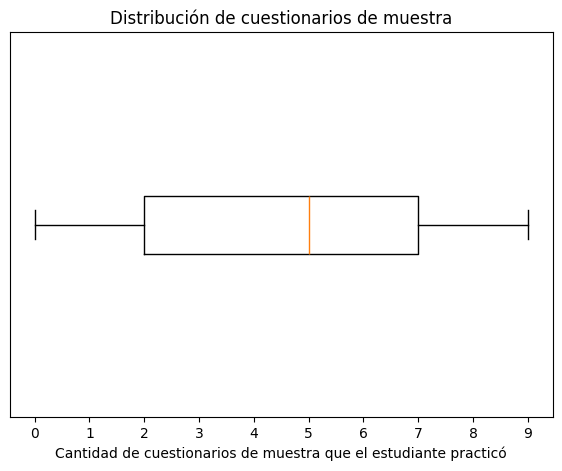

In [27]:
plt.figure(figsize=(7,5))
plt.boxplot(x=estudiantes['Sample Question Papers Practiced'], vert=False)
plt.xticks(ticks=np.arange(0,10,1))
plt.xlabel(xlabel='Cantidad de cuestionarios de muestra que el estudiante practicó')
plt.yticks(ticks=[])
plt.title(label='Distribución de cuestionarios de muestra')
plt.show()

#### 5.5.5. **Observaciones**

**Cuestionarios de muestra vs Cantidad de alumnos:**
* 6 cuestionarios es el número que mayor cantidad de alumnos han practicado.
* 2 cuestionarios el que menor número de alumnos.

**Distribución de cuestionarios de muestra:** 
* La distribución no presenta valores atípicos.

### 5.6. *Variable: 'Performance Index'*

#### 5.6.1. **Información general**

In [28]:
divider = "-" * 49

print(f'{divider}\n  Variable: "Performance Index"\n{divider}')

print(f'Valores unicos: {np.sort(estudiantes["Performance Index"].unique())}')
print(f'Cantidad de valores unicos: {estudiantes["Performance Index"].nunique()}')
print(f'Tipo de dato: {estudiantes["Performance Index"].dtype}')

print(f'{divider}\n{estudiantes["Performance Index"].describe()}\n{divider}')

-------------------------------------------------
  Variable: "Performance Index"
-------------------------------------------------
Valores unicos: [ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100.]
Cantidad de valores unicos: 91
Tipo de dato: float64
-------------------------------------------------
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64
-------------------------------------------------


#### 5.6.2. **Cambiamos el tipo de datos de la variable**

In [29]:
estudiantes['Performance Index'] = estudiantes['Performance Index'].astype('int8')

#### 5.6.3. **Frecuencia absoluta (por intervalos)**

In [30]:
frec_abs_performance_intervalos = pd.cut(x=estudiantes['Performance Index'], bins=np.append(np.arange(10,91,10), 101), right=False,)
frec_abs_performance_intervalos = frec_abs_performance_intervalos.value_counts().to_frame().reset_index().rename(columns={'Performance Index':'intervalos' ,	'count': 'frec_abs'}).sort_values(by='intervalos').reset_index(drop=True)
frec_abs_performance_intervalos

,intervalos,frec_abs
0,"[10, 20)",210
1,"[20, 30)",798
2,"[30, 40)",1374
3,"[40, 50)",1709
4,"[50, 60)",1619
5,"[60, 70)",1636
6,"[70, 80)",1475
7,"[80, 90)",909
8,"[90, 101)",270


#### 5.6.4. **Intervalos Índice rendimiento academico general vs Cantidad de alumnos (agrupado en intervalos)**

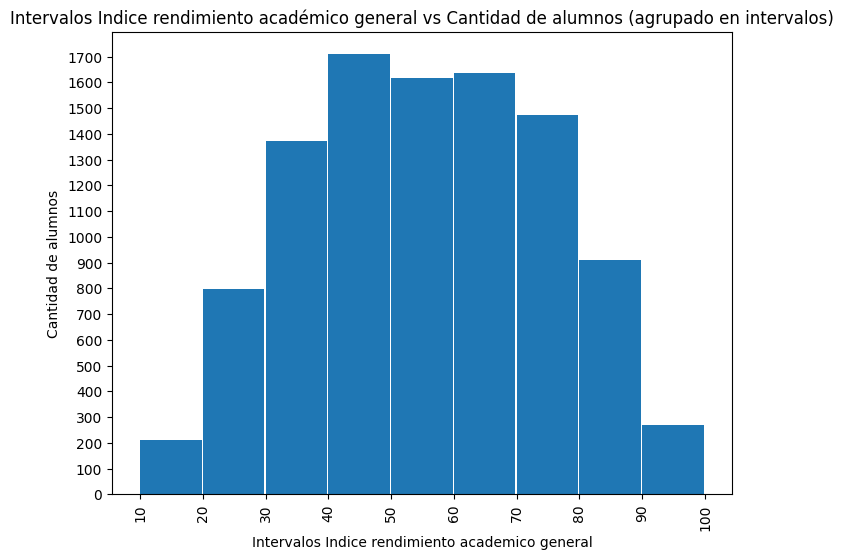

In [31]:
plt.figure(figsize=(8,6))
plt.bar(x=np.arange(10,91,10), height='frec_abs', data=frec_abs_performance_intervalos, align='edge', width=9.8)
plt.xlabel(xlabel='Intervalos Indice rendimiento academico general')
plt.xticks(ticks=np.arange(10,101,10), rotation=90)
plt.ylabel(ylabel='Cantidad de alumnos')
plt.yticks(ticks=np.arange(0,1701,100))
plt.title(label='Intervalos Indice rendimiento académico general vs Cantidad de alumnos (agrupado en intervalos)')
plt.show()

#### 5.6.5. **Distribución de cuestionarios de muestra**

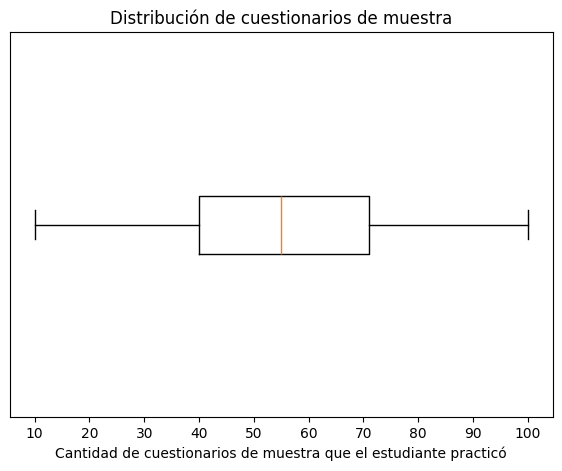

In [32]:
plt.figure(figsize=(7,5))
plt.boxplot(x=estudiantes['Performance Index'], vert=False)
plt.xticks(ticks=np.arange(10,101,10))
plt.xlabel(xlabel='Cantidad de cuestionarios de muestra que el estudiante practicó')
plt.yticks(ticks=[])
plt.title(label='Distribución de cuestionarios de muestra')
plt.show()

#### 5.6.6. **Observaciones**

**Información general:**
* Los números estaban redondeados al entero más cercano por lo que había que ajustar el tipo de dato.

**Distribución de cuestionarios de muestra:**
* La distribución es bastante simetrica.
* Refleja lo que dicen las medidas resumen media en *55*.

## 6. **Matriz de correlación**

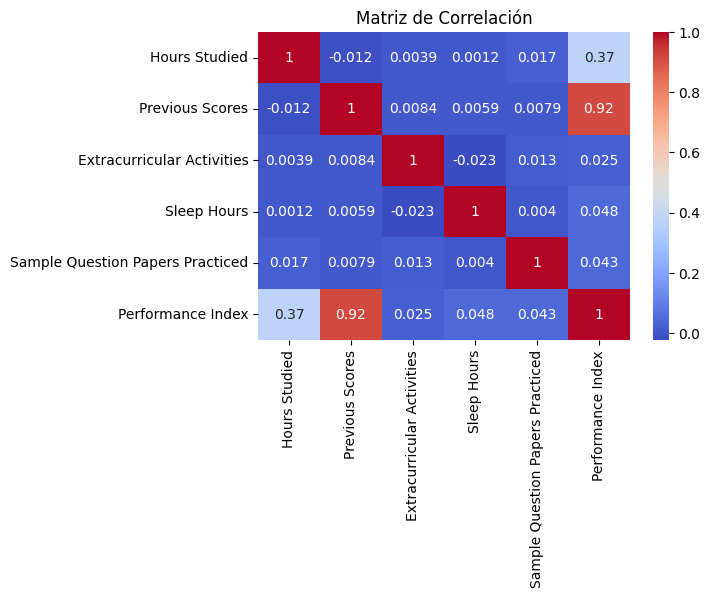

In [33]:
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(estudiantes.corr(), annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()

No hay mucha correlacion entre ninguna de las variables salvo por 'Previous Scores' y 'Performance Index' lo cual puede parecer tener sentido.

## 7. **Escalar variables**

In [34]:
escalador_z = StandardScaler()
estudiantes_escalado = escalador_z.fit_transform(estudiantes)
estudiantes_escalado = pd.DataFrame(estudiantes_escalado, columns=estudiantes.columns)
estudiantes_escalado.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.010455,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1.010455,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,-0.989654,0.866505,0.145333,0.560870


## 8. **División Train-Test**

In [35]:
X = estudiantes_escalado.drop(columns='Performance Index')
y = estudiantes_escalado['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. **Redes Neuronales Densas**

### 9.1. *Preparacion de R2 Ajustado para poder incluirlo como metrica en .compile()*

In [36]:
class R2Adjusted(tf.keras.metrics.Metric):
    def __init__(self, name='r2_adjusted', **kwargs):
        super(R2Adjusted, self).__init__(name=name, **kwargs)
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros')
        self.total_variance = self.add_weight(name='total_variance', initializer='zeros')
        self.total_residuals = self.add_weight(name='total_residuals', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Calcula los residuos
        residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        # Calcula la suma de los cuadrados de los residuos
        self.total_residuals.assign_add(residuals)
        # Calcula la suma de los cuadrados totales
        total_variance = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
        self.total_variance.assign_add(total_variance)
        # Incrementa el contador de muestras
        num_samples = tf.cast(tf.size(y_true), dtype=tf.float32)
        self.total_samples.assign_add(num_samples)

    def result(self):
        mean_residuals = tf.divide(self.total_residuals, self.total_samples)
        mean_variance = tf.divide(self.total_variance, self.total_samples)
        r2 = 1 - tf.divide(mean_residuals, mean_variance)
        r2_adjusted = 1 - (1 - r2) * (tf.divide(self.total_samples - 1, self.total_samples - 1 - 1))
        return r2_adjusted

### 9.2. *Prueba de modelo con únicamente una capa de salida y un LR fijo*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.0840 - r2_adjusted: 0.9134 - val_loss: 0.0111 - val_r2_adjusted: 0.9886
Epoch 2/200
200/200 [==============================] - 1s 3ms/step - loss: 0.0119 - r2_adjusted: 0.9878 - val_loss: 0.0118 - val_r2_adjusted: 0.9879
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.0121 - r2_adjusted: 0.9874 - val_loss: 0.0118 - val_r2_adjusted: 0.9879
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 0.0122 - r2_adjusted: 0.9874 - val_loss: 0.0118 - val_r2_adjusted: 0

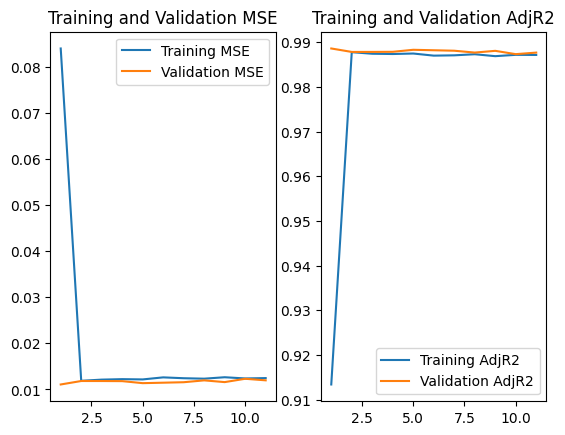


---------------------------------------------------------
Metricas Finales:
---------------------------------------------------------
           loss  r2_adjusted
Train  0.012170     0.987446
Test   0.011698     0.987817
---------------------------------------------------------

Tiempo de ejecución: 7.31 segundos


In [37]:
# Empezamos calculando el tiempo de ejcución
start_time = time.time()

# Modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(1, activation='linear'))
optimizer = optimizers.Adam(learning_rate=0.03)

# Resumen
model.summary()

# Compliacion del modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[R2Adjusted()])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

# Épocas
epochs = 200

# Entrenamiento
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=32,
    callbacks=[early_stopping],
)

# Métricas
evaluacion_train = model.evaluate(x=X_train, y=y_train, verbose=0, return_dict=True)
evaluacion_test = model.evaluate(x=X_test, y=y_test, verbose=0, return_dict=True)

loss = history.history['loss']
epoch = range(1, len(loss)+1, 1)
val_loss = history.history['val_loss']
r2_adjusted = history.history['r2_adjusted']
val_r2_adjusted = history.history['val_r2_adjusted']

plt.figure()

plt.subplot(1,2,1)
plt.plot(epoch, loss, label='Training MSE')
plt.plot(epoch, val_loss, label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')

plt.subplot(1,2,2)
plt.plot(epoch, r2_adjusted, label='Training AdjR2')
plt.plot(epoch, val_r2_adjusted, label='Validation AdjR2')
plt.legend(loc='lower right')
plt.title('Training and Validation AdjR2')

plt.show()

metricas_finales_test1 = pd.DataFrame(columns=evaluacion_train.keys())
metricas_finales_test1.loc['Train'] = evaluacion_train.values()
metricas_finales_test1.loc['Test'] = evaluacion_test.values()

print('\n' + '-' * 57)
print('Metricas Finales:')
print('-' * 57)
print(metricas_finales_test1)
print('-' * 57 + '\n')

# Calculamos y mostramos el tiempo total de ejecución
end_time = time.time()
total_time_test1 = end_time - start_time
print(f'Tiempo de ejecución: {total_time_test1:.2f} segundos')

### 9.3. *Prueba de modelo con dos capas ocultas con dos neuronas cada una y LR ajustado automáticamente*

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 1.1031 - r2_adjusted: -0.1401 - val_loss: 1.0234 - val_r2_adjusted: -0.0522 - lr: 0.0010
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.9782 - r2_adjusted: -0.0094 - val_loss: 0.9143 - val_r2_adjusted: 0.0599 - lr: 0.

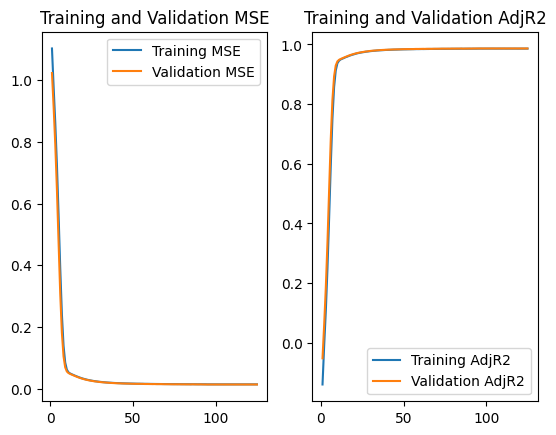


---------------------------------------------------------
Metricas Finales:
---------------------------------------------------------
           loss  r2_adjusted
Train  0.013349     0.986230
Test   0.013189     0.986264
---------------------------------------------------------

Tiempo de ejecución: 61.23 segundos


In [38]:
# Empezamos calculando el tiempo de ejcución
start_time = time.time()

# Modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# Resumen
model.summary()

# Compliacion del modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[R2Adjusted()])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, verbose=0, min_delta=1e-4, mode='min')

# Épocas
epochs = 200

# Entrenamiento
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
)

# Métricas
evaluacion_train = model.evaluate(x=X_train, y=y_train, verbose=0, return_dict=True)
evaluacion_test = model.evaluate(x=X_test, y=y_test, verbose=0, return_dict=True)

loss = history.history['loss']
epoch = range(1, len(loss)+1, 1)
val_loss = history.history['val_loss']
r2_adjusted = history.history['r2_adjusted']
val_r2_adjusted = history.history['val_r2_adjusted']

plt.figure()

plt.subplot(1,2,1)
plt.plot(epoch, loss, label='Training MSE')
plt.plot(epoch, val_loss, label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation MSE')

plt.subplot(1,2,2)
plt.plot(epoch, r2_adjusted, label='Training AdjR2')
plt.plot(epoch, val_r2_adjusted, label='Validation AdjR2')
plt.legend(loc='lower right')
plt.title('Training and Validation AdjR2')

plt.show()

metricas_finales_test2 = pd.DataFrame(columns=evaluacion_train.keys())
metricas_finales_test2.loc['Train'] = evaluacion_train.values()
metricas_finales_test2.loc['Test'] = evaluacion_test.values()

print('\n' + '-' * 57)
print('Metricas Finales:')
print('-' * 57)
print(metricas_finales_test2)
print('-' * 57 + '\n')

# Calculamos y mostramos el tiempo total de ejecución
end_time = time.time()
total_time_test2 = end_time - start_time
print(f'Tiempo de ejecución: {total_time_test2:.2f} segundos')

### 9.4. *Observaciones*

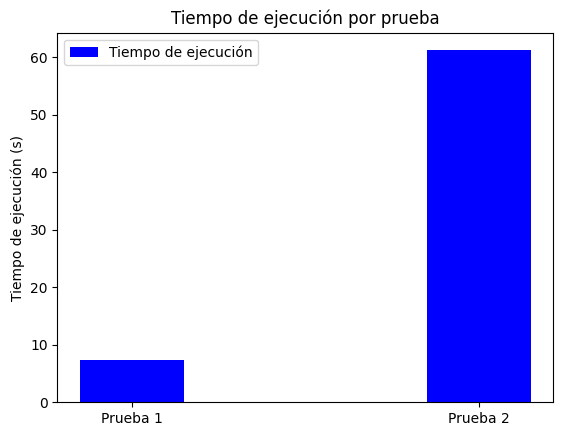

In [39]:
# Tiempo de ejecución de cada prueba
time_test1, time_test2 = round(total_time_test1, 2), round(total_time_test2, 2)
tiempo = [time_test1, time_test2]  

# Etiquetas para las pruebas
labels = ['Prueba 1', 'Prueba 2']

x = np.arange(len(labels))
width = 0.3

# Gráfico de barras
fig, ax = plt.subplots()

# Barras para el tiempo de ejecución
ax.bar(x, tiempo, width, label='Tiempo de ejecución', color='b')

# Etiquetas, título y leyenda
ax.set_ylabel('Tiempo de ejecución (s)')
ax.set_title('Tiempo de ejecución por prueba')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

* En la primera prueba, el modelo sin capas ocultas con solo con una capa de salida con activación *linear* fue capaz de sacar un **R2 ajustado** muy cercano a 1 y un **loss** muy cercano a 0 en muy poco tiempo debido a que se detuvo por el *early stopping*.

* En la segunda prueba se añadieron dos capas ocultas con dos neuronas cada una. Lo que pudimos ver es que fue capaz de sacar un **R2 ajustado** y un **loss** muy parecido a la primera prueba con la única diferencia que es el tiempo de ejecución. En este caso el *early stopping* lo paró mucho más adelante que la primera tardando en consecuencia más tiempo.

Como tal el tiempo de ejecución de ambas pruebas en cada época es prácticamente inferior a 1 segundo, por lo que se hagan o no mayor cantidad de épocas hasta que se pare el modelo no necesariamente en este caso es malo. Pero, considerando que uno tardó menos que el otro, sacó los mismos resultados y además es menos complejo (no tanto, pero lo es), el mejor modelo a utilizar sería el primero. Sin capas ocultas y únicamente una capa de salida con activación linear.